# PyGMT - first figure and subplot 
https://www.pygmt.org/latest/index.html

This tutorial will cover the fundamental concepts behind making figures with PyGMT: 
- drawing coastlines,
- drawing a map frame,
- choosing a projection,
- downloading remote dataset,
- imaging Earth's relief,
- creating colorbar,
- subplot in a figure.

##### Preworkshop in 2024 AGU Fall Meeting in Washington, DC, United States
###### Jing-Hui Tong | jhtong33@gmail.com | National Taiwan University

:::{tip}
In Jupyter, some shortcut key will increase your learning curve!
* Run cell: `Shift`+`Enter`
* Code indentation: `TAB`
* Code dedenting: `Shift`+`TAB`
* Writing single-line comments: begining with **#** or `Command`+`/`
* Auto-completion: `TAB` while you writing some code
:::

## Importing 

First thing to do is load PyGMT (`import`) so that we can access its functionality. 

PyGMT has a flat package layout, meaning that you can access everything in it with a single `import`.

In [1]:
import pygmt

## Starting your first figure -- [`pygmt.Figure`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.html#pygmt.Figure)
Every figure must start with the creation of a pygmt.Figure

In [2]:
fig = pygmt.Figure()

We have blank canvas in the `fig` variable now, we will overlay elements and show it on same `fig`. 

## Drawing coastline -- [`figure.coast`](https://www.pygmt.org/dev/api/generated/pygmt.Figure.coast.html)
Before plotting, you need to define 
1. `region`: controling the geographic or Cartesian extent of the figure. Regions are specified as lists of `[xmin, xmax, ymin, ymax]`. Another shortcut, `region='g'`, which specifies a **global** domain.
2. `projection`: controling the map projection. GMT (and therefore PyGMT) supports 31 different map projections, from basic Cartesian axes to [arbitrary vertical perspectives](https://docs.generic-mapping-tools.org/latest/gallery/ex26.html). Again, if you're familiar with GMT, these are specified using the `-J` flag, as in `-JM4i`. In PyGMT, projections codes are still strings, but the `J` is dropped, so an equivalent PyGMT argument would be `projection='M4i'`.

> Determining the size of your images `4i`, the size will affect how large of your following fontsize and markersize
>> **length unit** `c`: cm / `i`: inch(2.54 cm) / `p`: point(1/72 of an inch)

> More projections please click https://www.pygmt.org/latest/projections/index.html

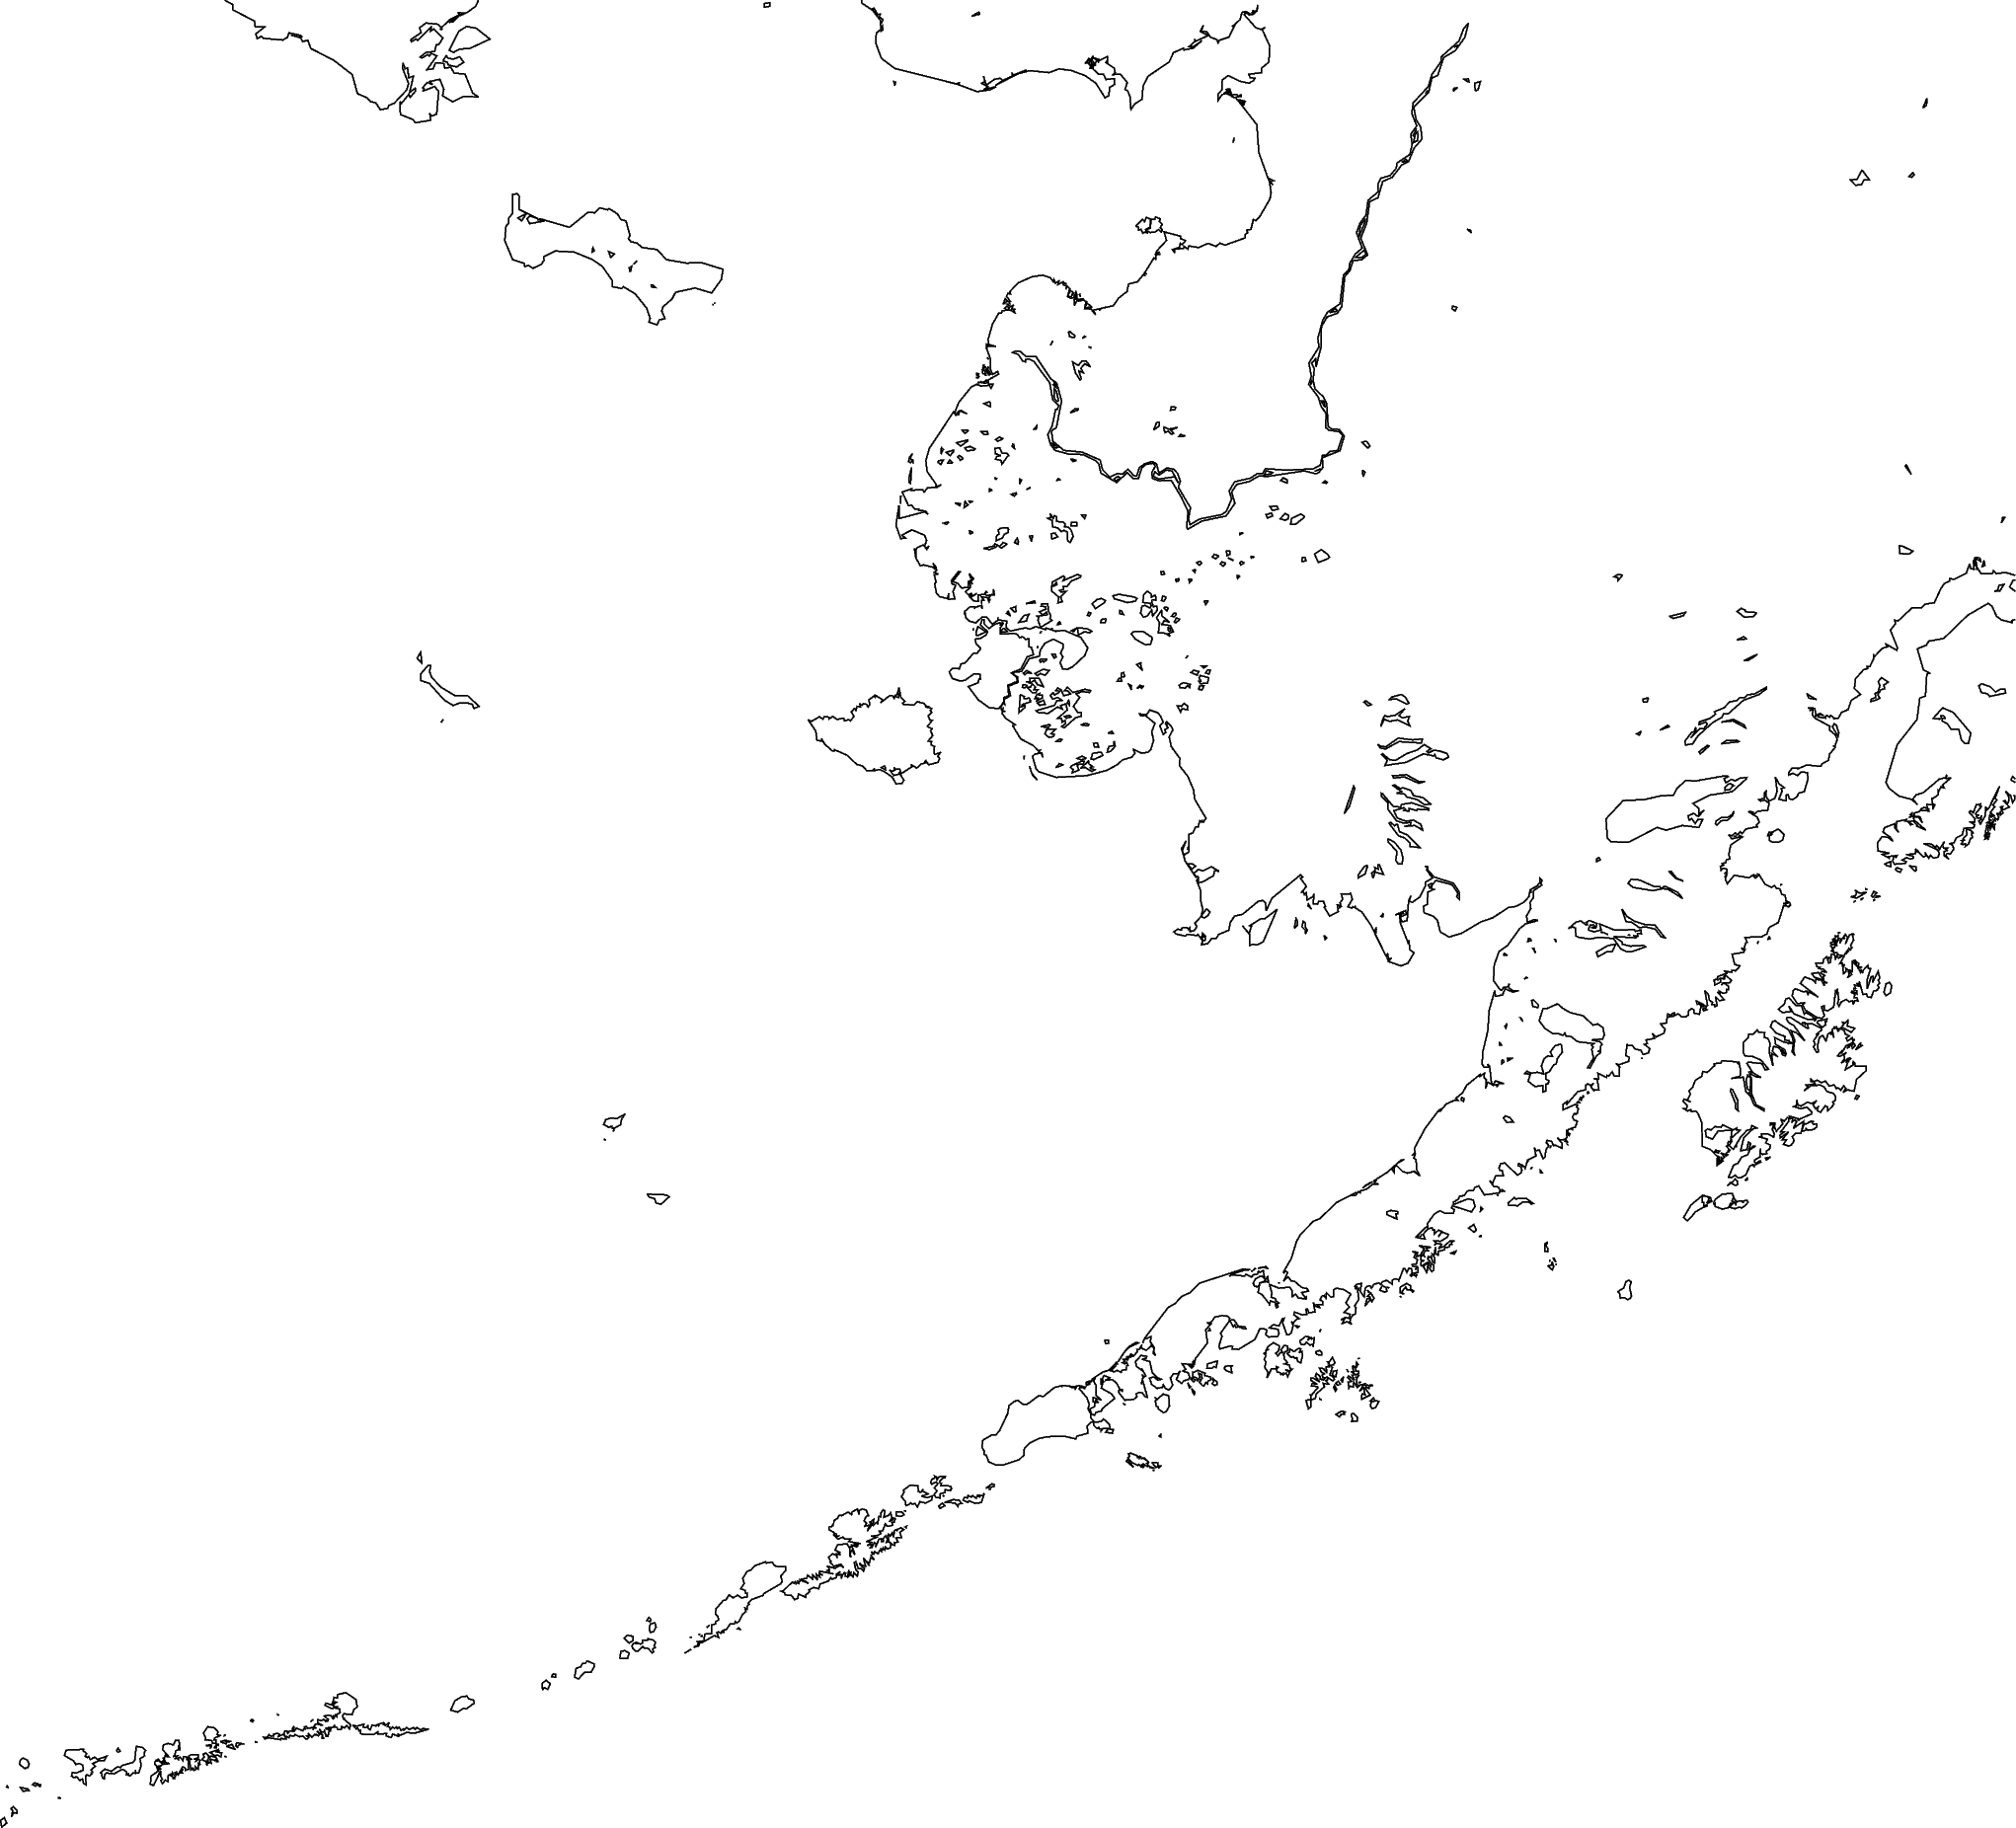

In [3]:
region = [-180, -150, 50, 65]

fig.coast(region = region, 
          projection = 'M7i',
          shorelines=True)
fig.show() # To see the figure looks like

:::{seealso}
On Jupyter, `show` will embed a PNG of the figure directly into the notebook. But it can also open a PDF in an external viewer, which is probably what you want if you're using a plain Python script. See the documentation for [`pygmt.Figure.show`](https://www.pygmt.org/v0.6.1/api/generated/pygmt.Figure.show.html#pygmt.Figure.show) for more information.
:::

#### Coloring and add map element (frame and ticks)! 
1. Axis labels `WSne`: If an upper-case letter (W, S, N, E) is passed, the axis is plotted with tick marks and annotations. The lower-case version (w, s, n, e) plots the axis only with tick marks. To only plot the axis pass (l, b, t, r).

2. annotations `a`: tick labels
3. frame `f`: ticks
4. grid `g`: grid line in the figure. 
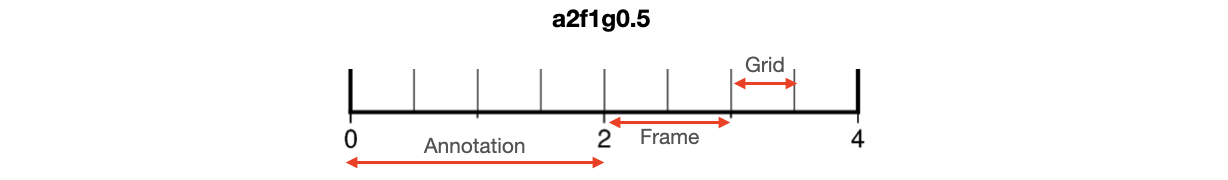

> More detail for frame https://www.pygmt.org/dev/tutorials/basics/frames.html

> More color https://docs.generic-mapping-tools.org/dev/_images/GMT_RGBchart.png 

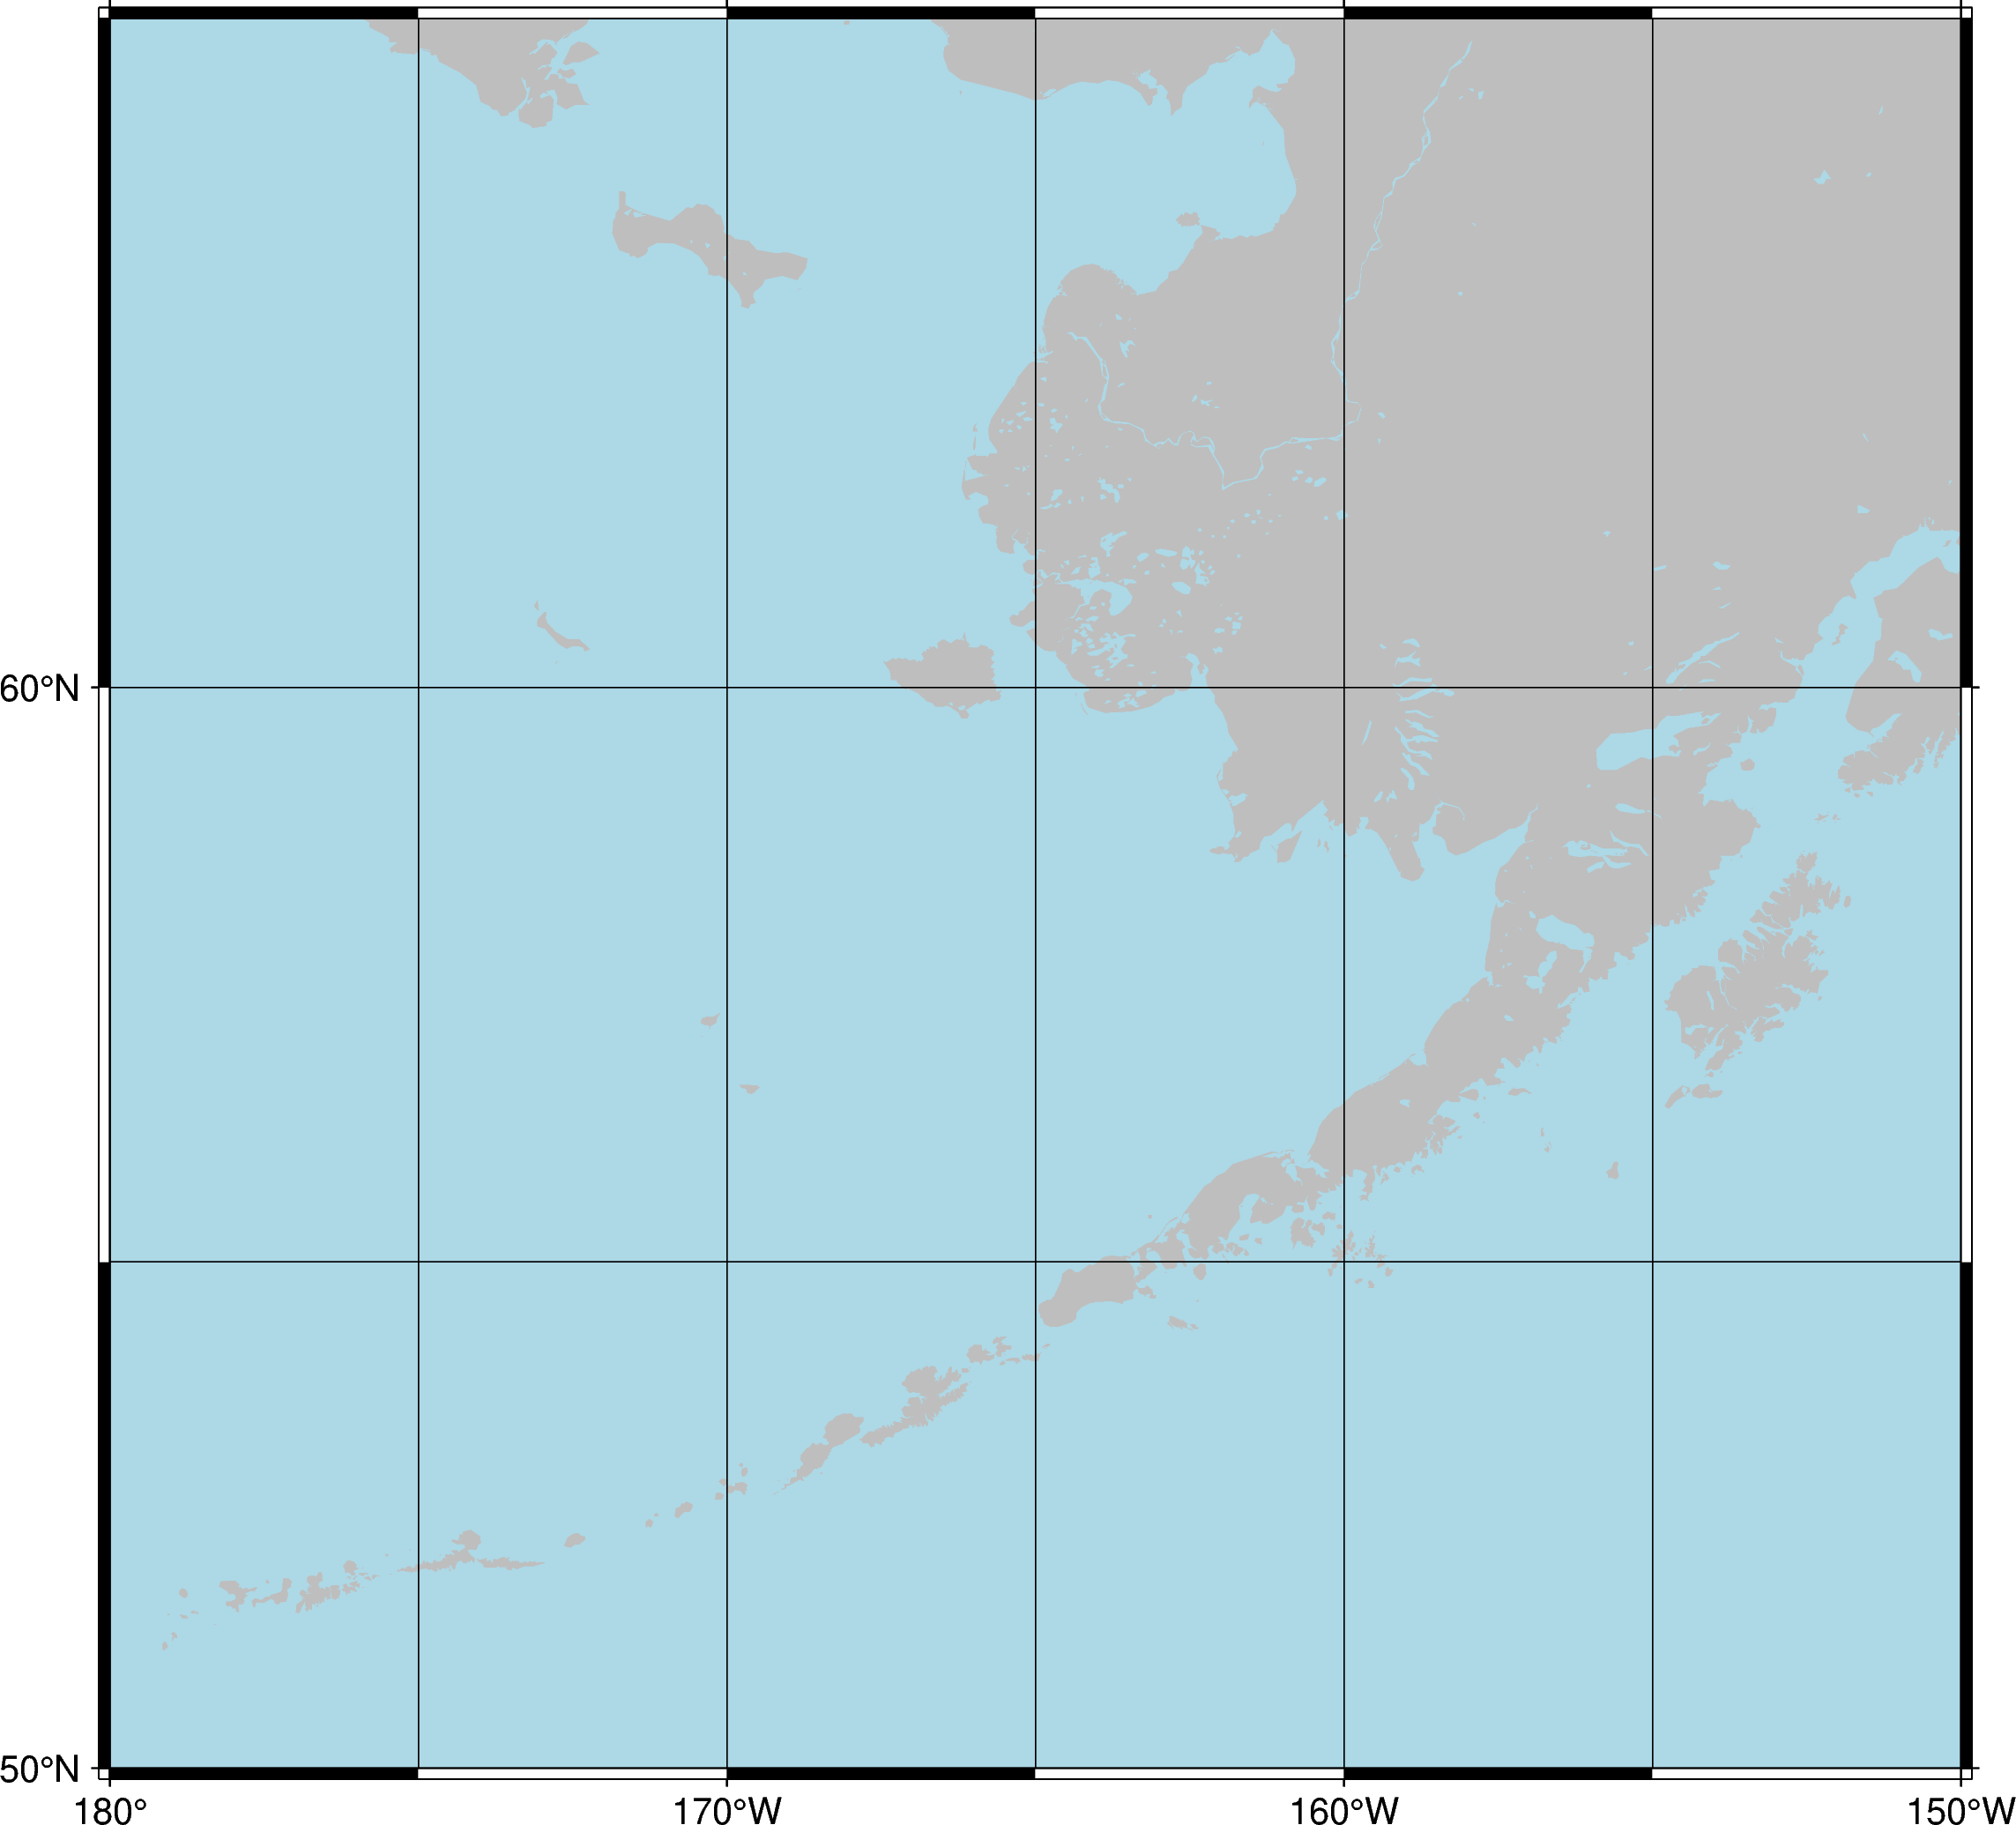

In [4]:
fig.coast(water='lightblue', 
          land='grey',
          frame=['WSne','a10f5g5']) 
fig.show()

#### NOTE
1. In GMT/PyGMT, plotting is achieved by layering new elements, meaning that each new element is stacked on top of the previous layers. 
Therefore, if you draw a black line in an earlier layer and then add a new layer (such as color filling), these new layers might cover the original black line, making it invisible.
2. In a **same figure**, once you define region/projection before, you don't need to define against. 

## Downloading global dataset -- [`pygmt.datasets`](https://www.pygmt.org/dev/api/index.html#datasets)


Before you access, you need to define 
1. `region`: Specify the region of interest, format is [xmin/xmax/ymin/ymax]
2. `resolution`: grid resolution. The suffix **d** (arc-degrees), **m** (arc-minutes), and **s** (arc-seconds).

In [102]:

grid = pygmt.datasets.load_earth_relief(resolution="03m", region=region)

# You also can access then cut the grid
# and this way can save grid (outgrid) as a file in your folder. 
# https://www.generic-mapping-tools.org/remote-datasets/

# pygmt.grdcut(grid='@earth_relief_03s',  
#              region=region,
#              outgrid='Alaska.grd', 
#              ) 

A way to confirm your grid information [`pygmt.grdinfo`](https://www.pygmt.org/dev/api/generated/pygmt.grdinfo.html)

In [6]:
print(pygmt.grdinfo(grid=grid))

: Title: 
: Command: 
: Remark: 
: Gridline node registration used [Geographic grid]
: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
: x_min: -180 x_max: -150 x_inc: 0.05 (3 min) name: x n_columns: 601
: y_min: 50 y_max: 65 y_inc: 0.05 (3 min) name: y n_rows: 301
: v_min: -7521.5 v_max: 4634 name: z
: scale_factor: 1 add_offset: 0
: format: classic
: Default CPT: 



## Visualizing grid -- [`figure.grdimage`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.grdimage.html#pygmt.Figure.grdimage)
Project and plot grids or images

Now, we start with a new canvas. So you need to set up region/projection against!

Before imaging, you need to define
1. `grid`: yes! we have already access the topography grids. 

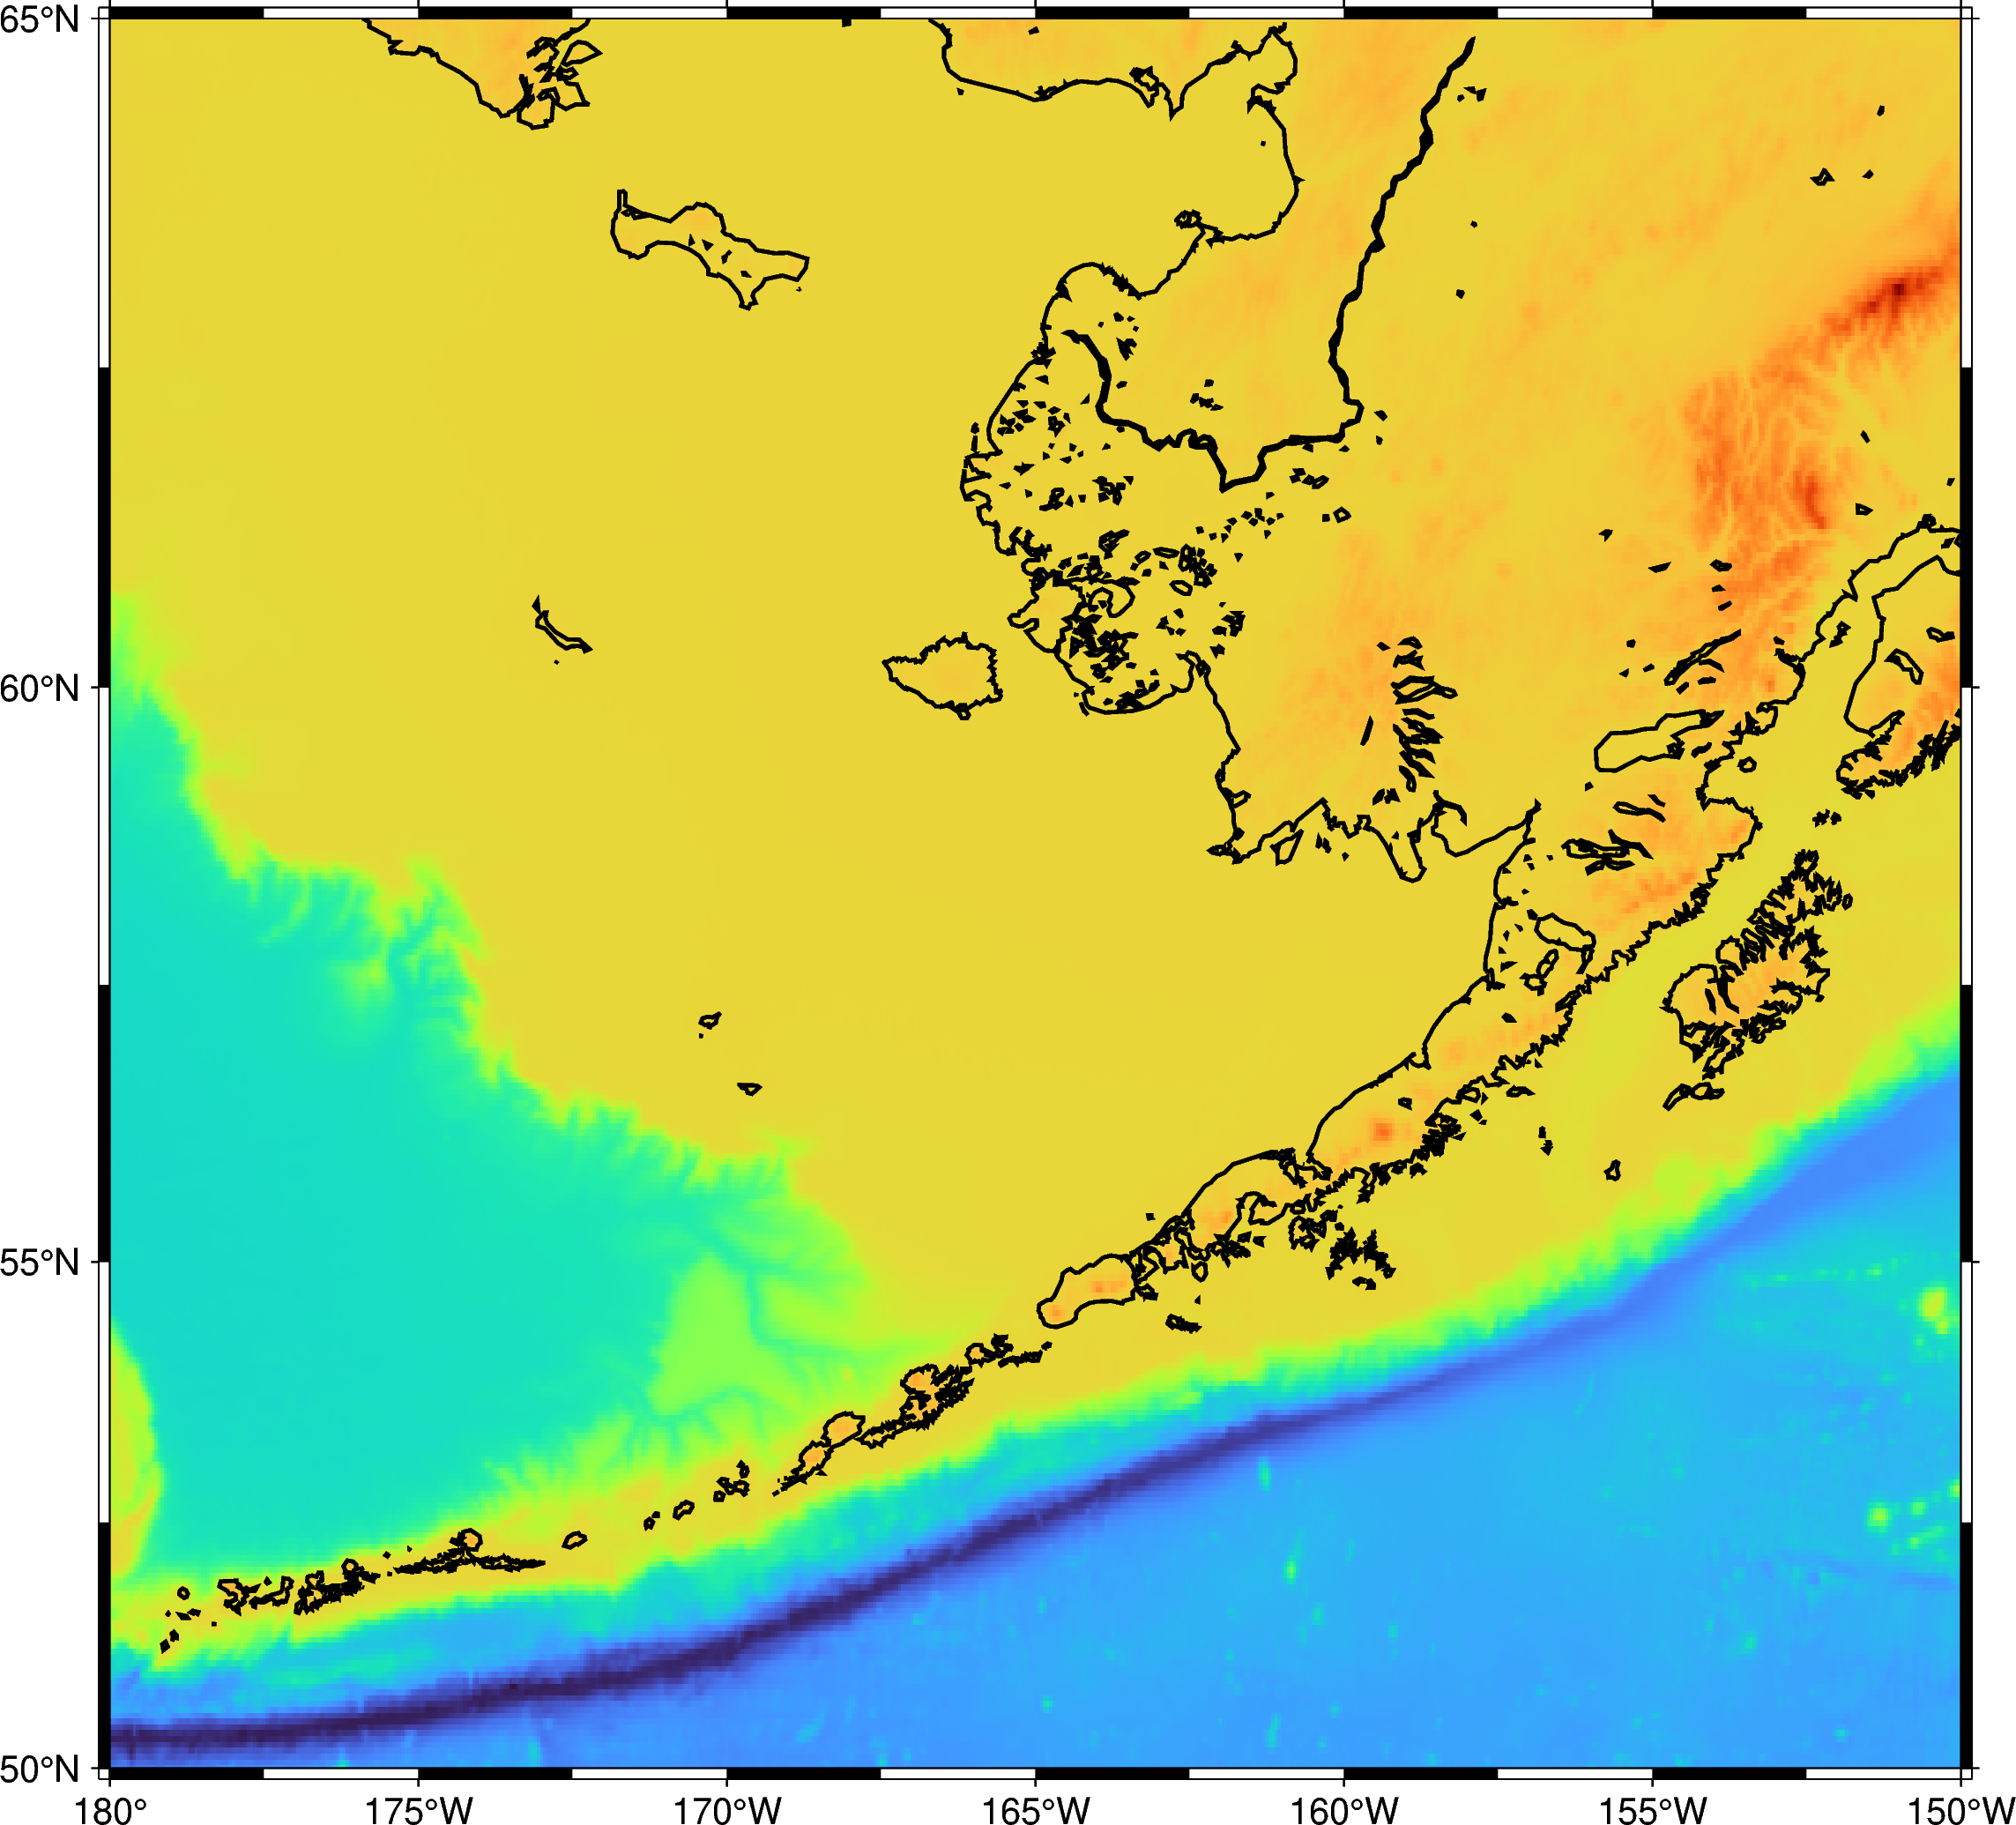

In [7]:
fig = pygmt.Figure()

fig.grdimage(grid = grid,
             region = region, 
             projection = 'M7i',)

fig.coast(shorelines='1p,black',
    frame=['WSne', 'a5f2.5']) 

fig.show()

## Customizing colorbar -- [`pygmt.makecpt`](https://www.pygmt.org/dev/api/generated/pygmt.makecpt.html)
Making GMT color palette tables.

You need to define, 
1. `cmap`: Choosing a colorbar to image your grid/dataset.
> More colorbar resources https://docs.generic-mapping-tools.org/6.4/_images/GMT_App_M_1a.png

2. `series`: Defining the range of the CPT by giving the lowest and highest z-value. e.g., [0, 500] (without interval) or [0, 500, 10] (defining the interval)

In [8]:
## make colorbar 
pygmt.makecpt(cmap="geo", 
      series=[-8000, 7000, 500],
      continuous=True,
      output = 'eleva.cpt') # The file name with extension .cpt to store the generated CPT file
                

Now, re-plot the figre with new colorbar and ...
## Adding [`figure.colorbar`](https://www.pygmt.org/dev/api/generated/pygmt.Figure.colorbar.html)
Plot a gray or color scale-bar on maps.

You need to define,
1. `cmap`: File name of a CPT file
2. `frame`: Set color bar boundary frame, labels, and axes attributes

    > 
    > * **+l** given colorbar title

3. `position`: Define the reference point on the map for the color scale

   > Four coordinate systems:
   >  * **g** for map (user) coordinates
   >  * **j** or **J** for setting reference point via a 2-character justification code
   >  * **x** for plot coordinates: x/y (specific position)
   >  * **n** for normalized (0-1) coordinates 



   > Others
   >  * **+w** for length and width of the color bar. e.g., +w10c/0.5c 
   >  * **+h** horizontal colorbar, if you want to plot vertical one, use **+v**
   >  * **+m** for colorbar title position
    
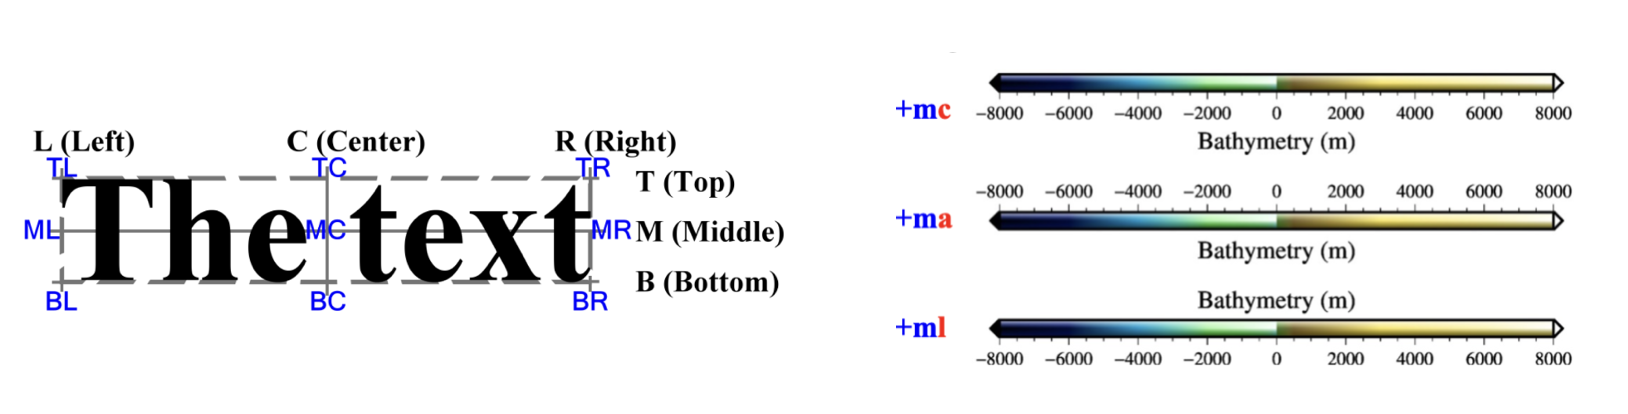

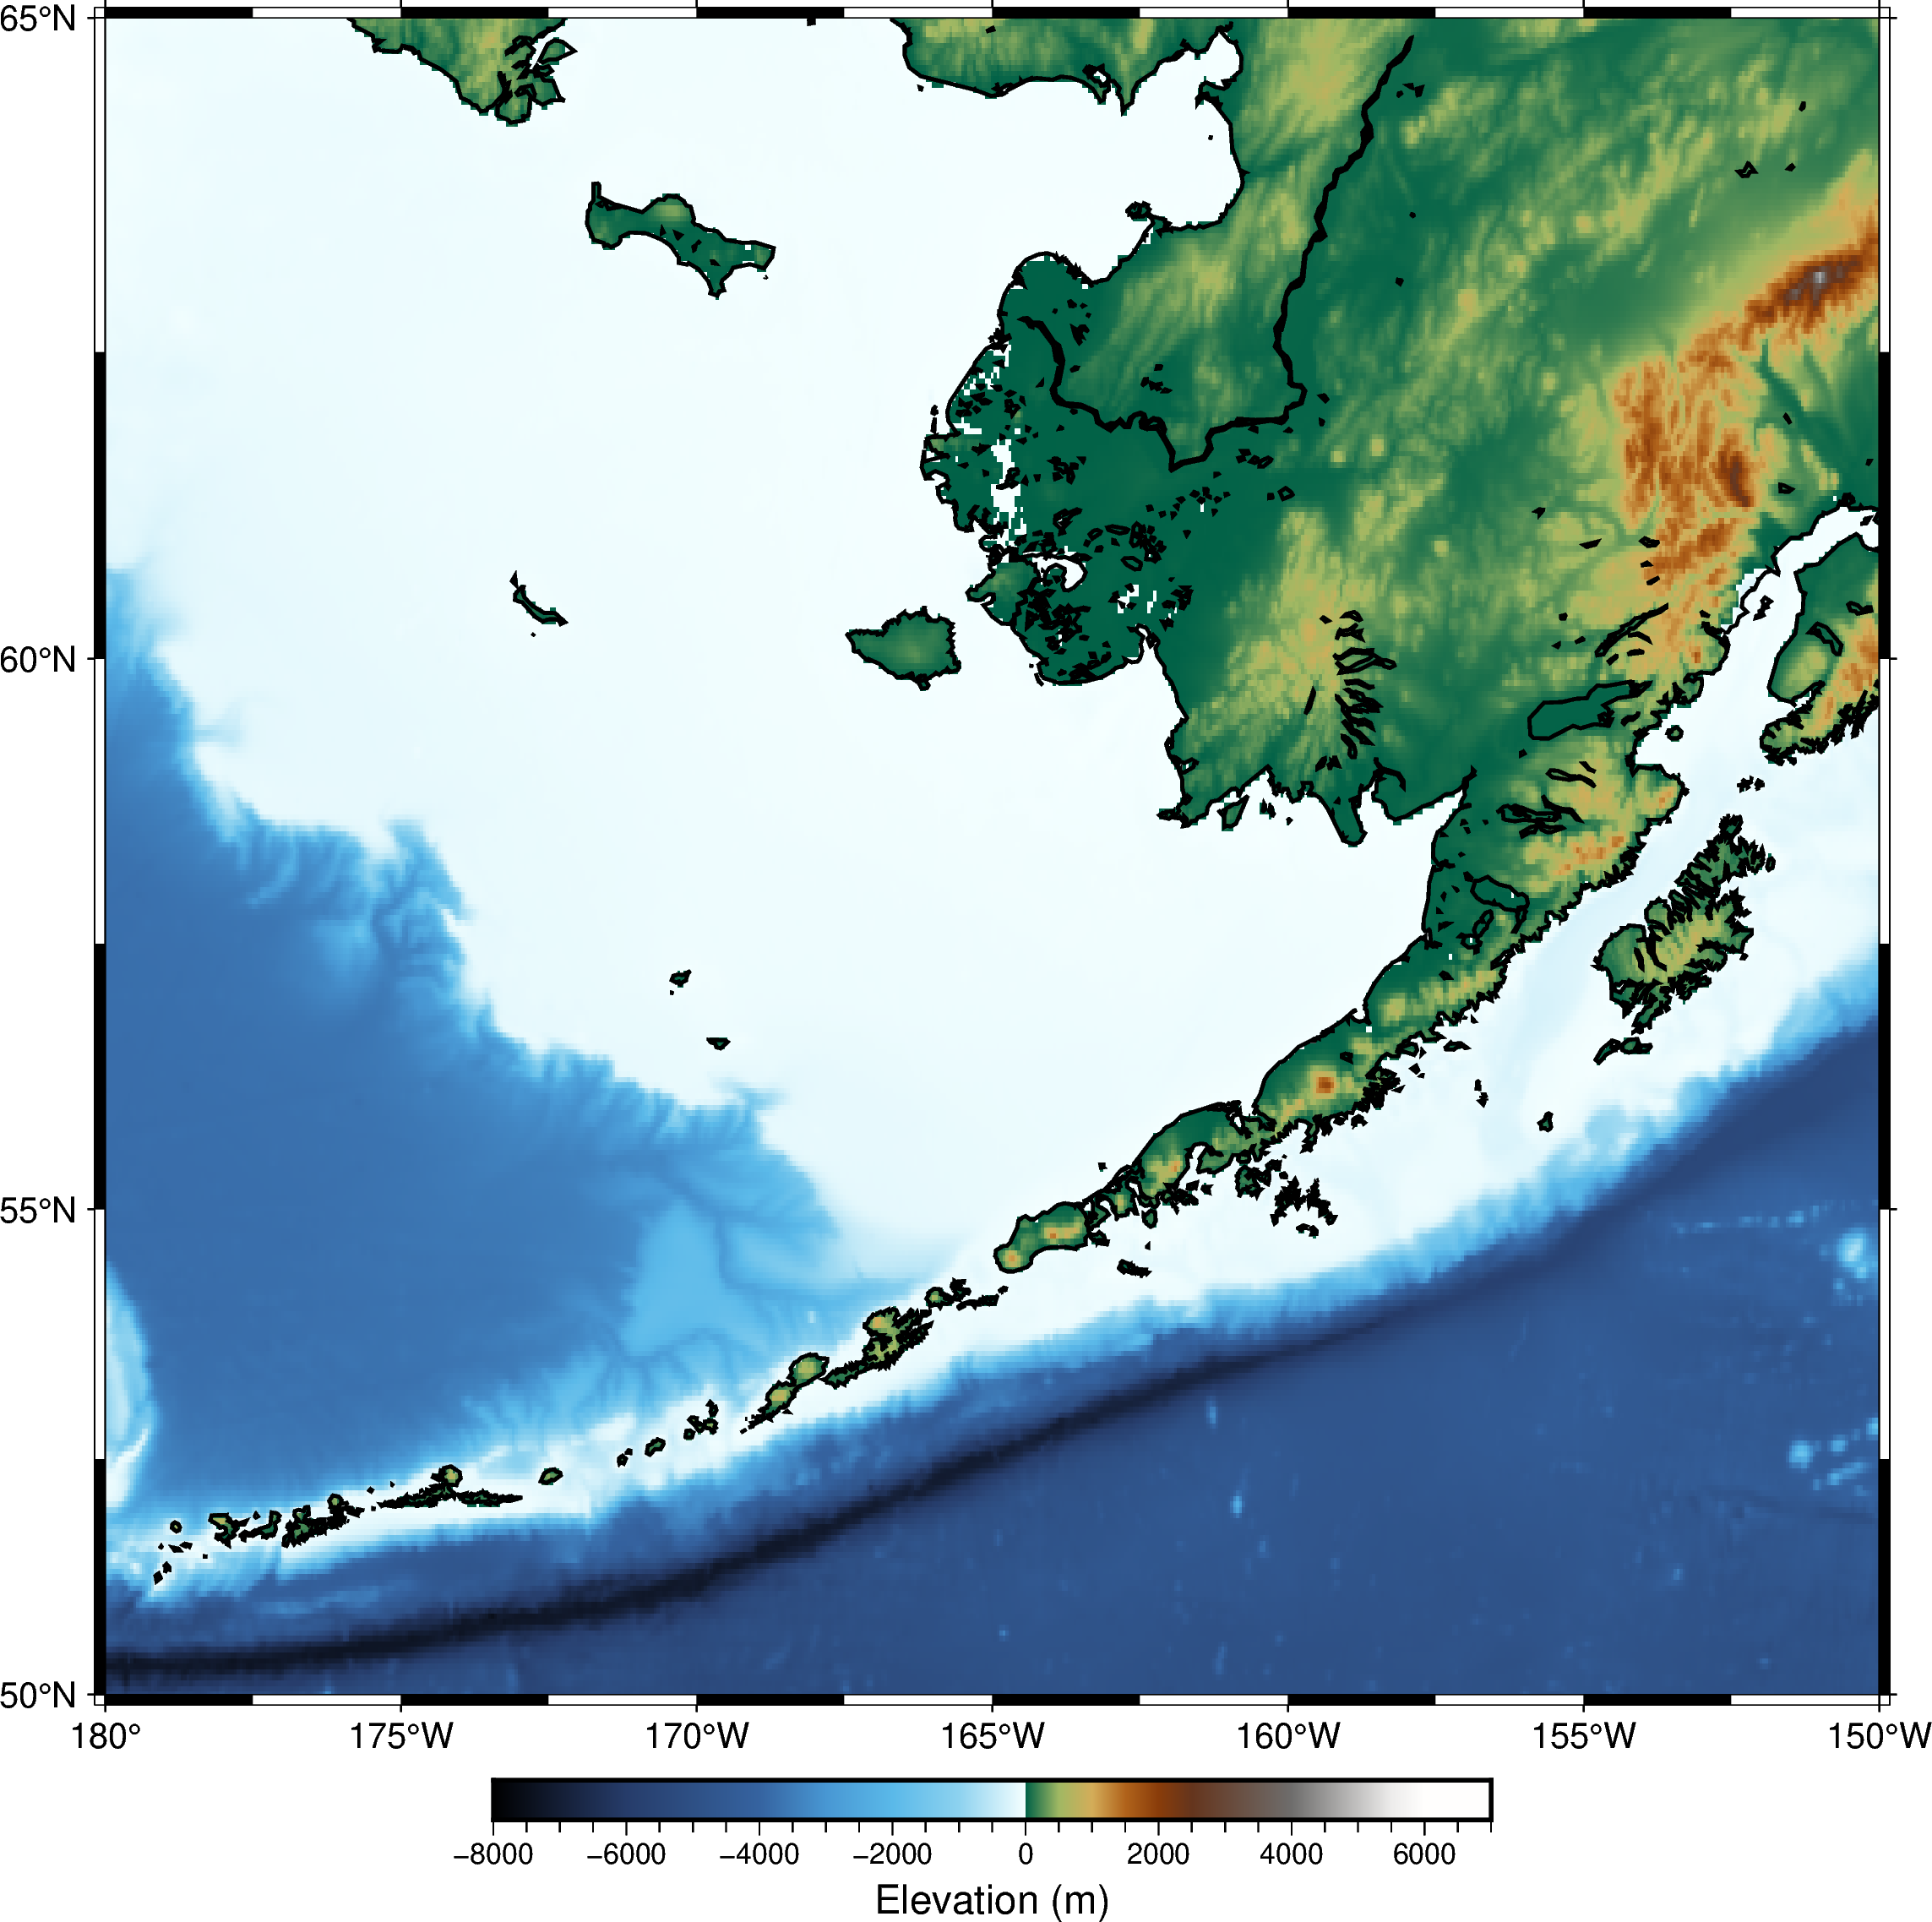

In [9]:
fig = pygmt.Figure()

fig.grdimage(grid = grid,
             region = region, 
             projection = 'M7i',
             cmap = 'eleva.cpt') 

fig.coast(shorelines='1p,black',
    frame=['WSne', 'a5f2.5']) 

fig.colorbar(cmap = 'eleva.cpt', 
             frame = 'a2000f500+l"Elevation (m)"'
             position = 'JMB+w10c/0.4c+mc+h',) 

fig.show()

## Creating multi-panel figures in a canva -- [`figure.subplot`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.subplot.html#pygmt.Figure.subplot) and [`figure.set_panel`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.set_panel.html#pygmt.Figure.set_panel)




First, you need to define the figure layout with fig.subplot:
1. `nrows`: number of vertical rows
2. `ncols`: number of horizontal columns
3. `figsize` or `subsize`: entire figure dimensions, e.g., [width, height]

Second, setting each plot with fig.set_panel:
1. `panel`: setting the current subplot panel to plot on. e.g., **index** or [**row**, **col**]

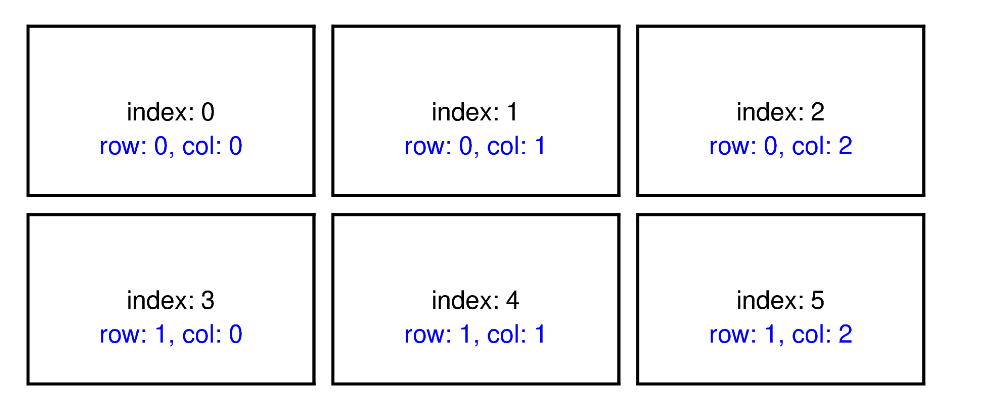


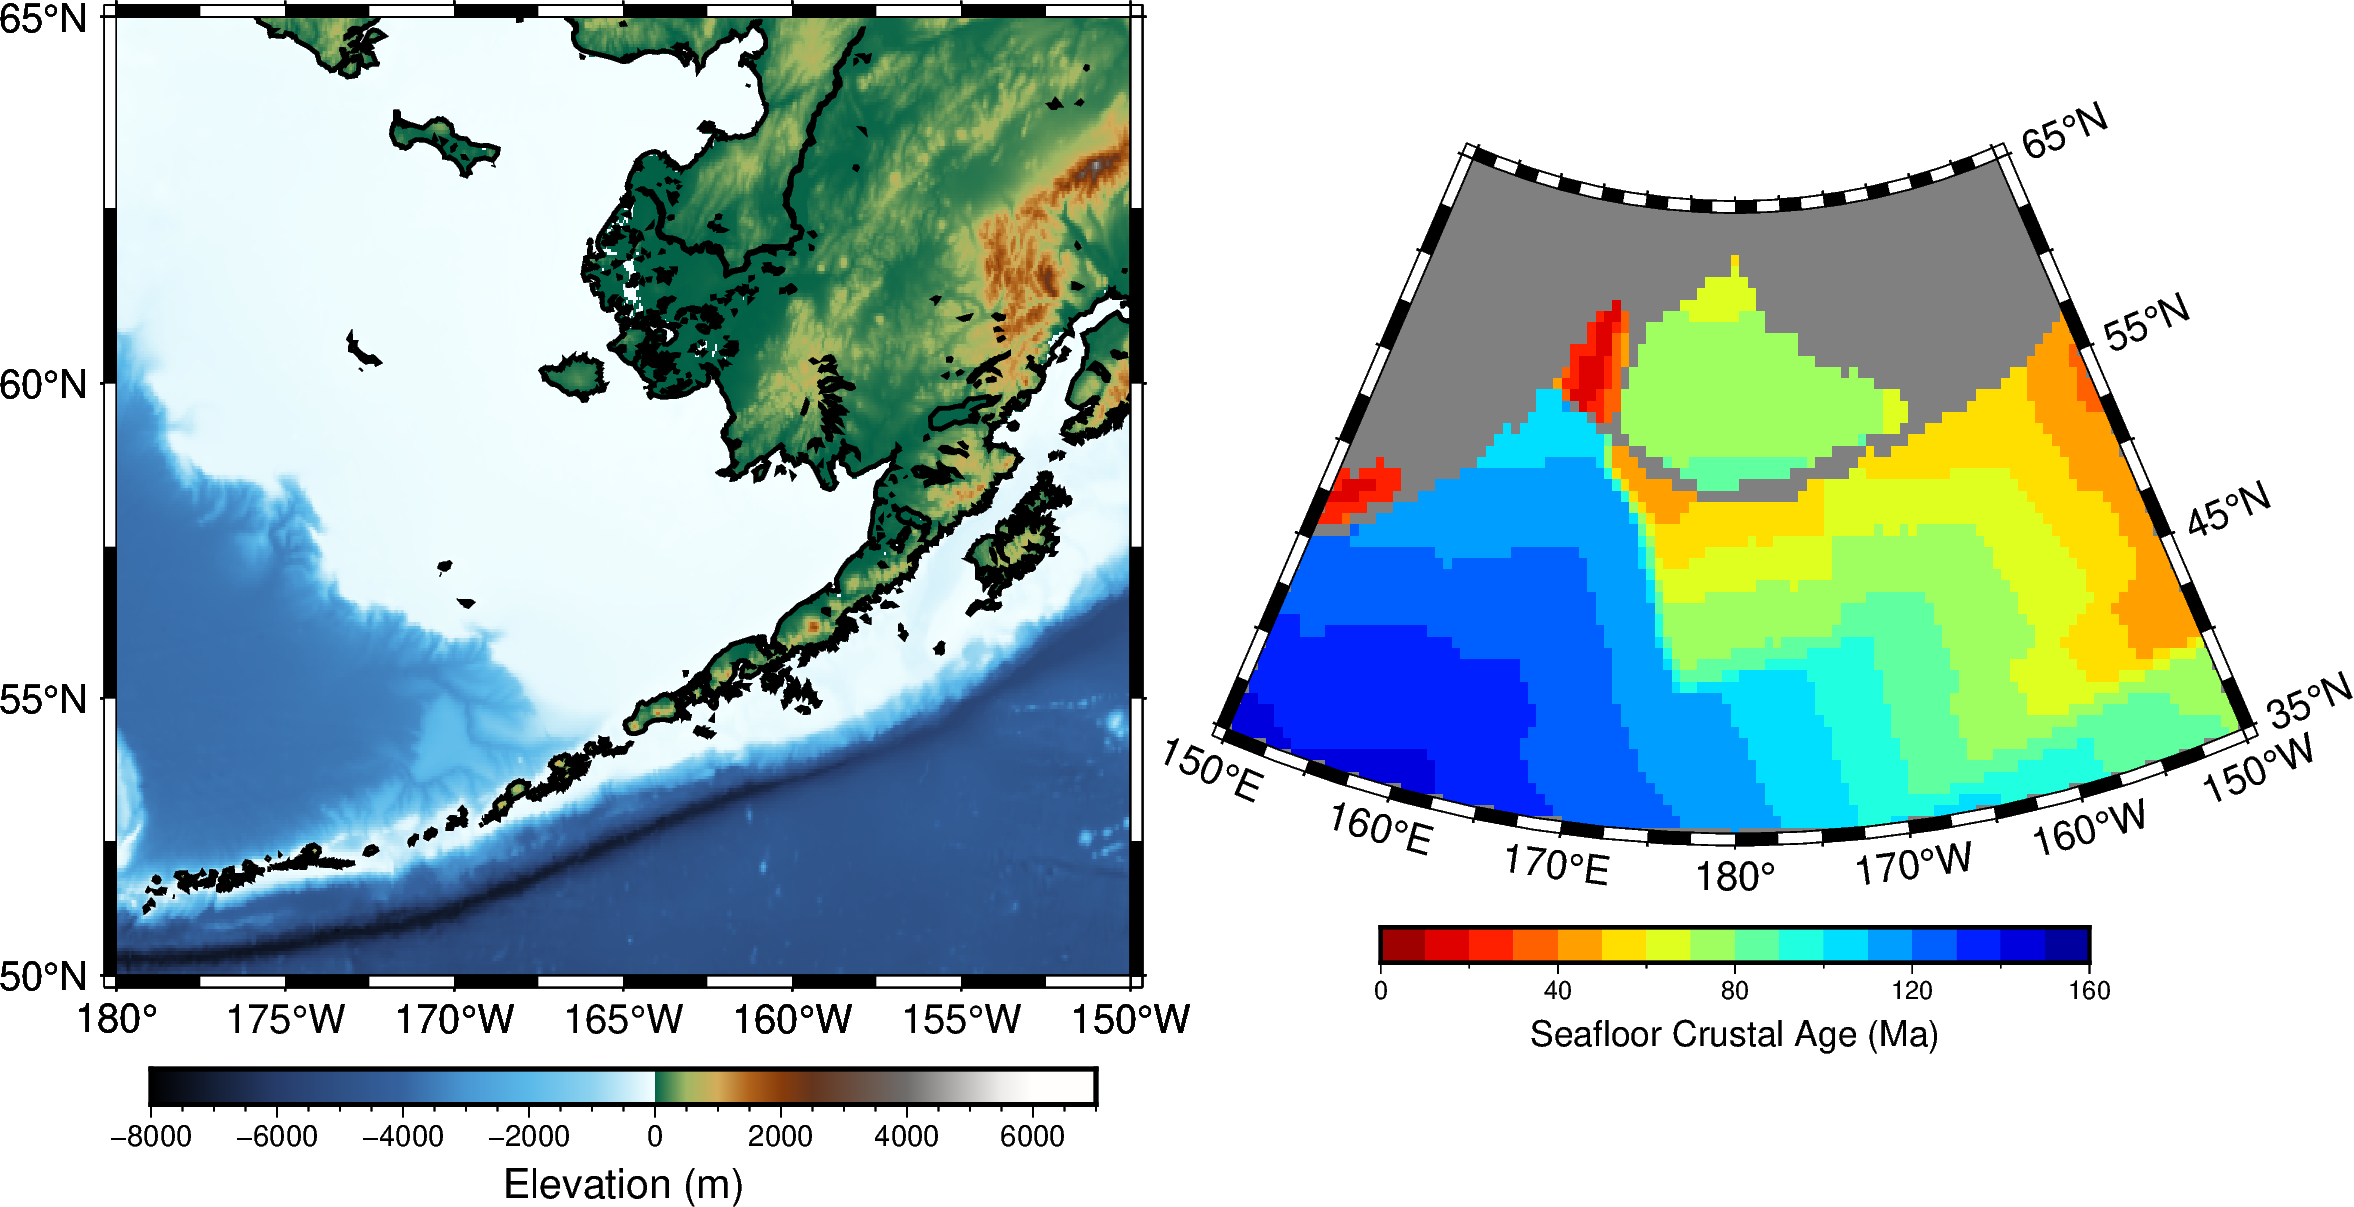

In [104]:
fig = pygmt.Figure()

grid_globe = pygmt.datasets.load_earth_age(resolution='30m', region=[-210, -150, 35, 65])

with fig.subplot(
    nrows=1, ncols=2, figsize=["18c",'12c']
):

    with fig.set_panel(panel=0):

        fig.grdimage(grid = grid,
                     region = region, 
                     # '?' means that map width automatically determined from the subplot width.
                     projection = 'M?', 
                     cmap = 'eleva.cpt') 
        fig.coast(shorelines='1p,black',
                  frame=['WSne', 'a5f2.5']) 
        fig.colorbar(cmap = 'eleva.cpt', 
                     position = 'JMB+w8c/0.3c+mc+h', 
                     frame = 'a2000f500+l"Elevation (m)"') 

    with fig.set_panel(panel=1):
        
        cpt = pygmt.makecpt(cmap="jet", series=[0, 160, 10], reverse=True )
        
        fig.grdimage(grid = grid_globe,
                     region = [-210, -150, 35, 65], 
                     projection='L-180/55/35/65/?',
                     frame=['a5f2.5','nSEw'],
                     cmap=cpt) 
        
        fig.colorbar(cmap = cpt, 
                     position = 'JMB+w6c/0.3c+mc+h', 
                     frame = 'a40f20+l"Seafloor Crustal Age (Ma)"') 

fig.show()

### Basic projection types: 

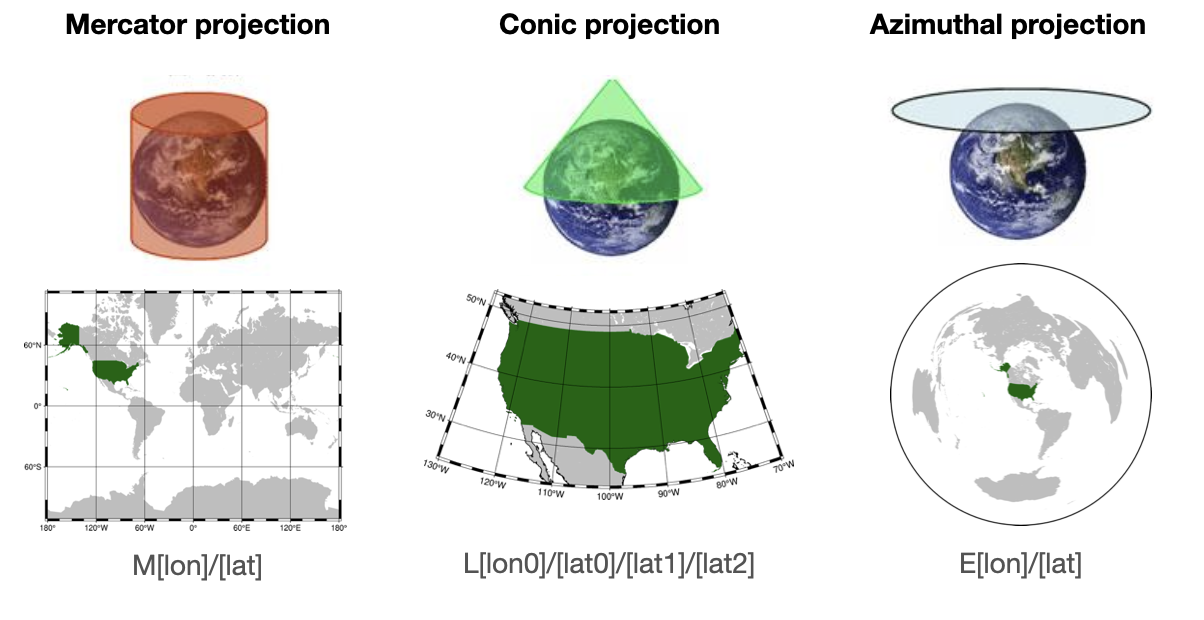

By default, PyGMT will use an equidistant cylindrical projection if the region seems to be geographic longitude and latitude.

1. Mercator Projection -- mapping the Earth onto a cylinder, preserving angles, making it useful for navigational purposes.

* Use Case: Ideal for world maps where direction needs to be preserved, such as marine navigation. This projection distorts size, especially near the poles.
* GMT Command: **M[lon]/[lat]**, specifying the central longitude and latitude.

2. Conic Projection -- projecting the Earth onto a cone.
   
* Use Case: for regional maps, especially in mid-latitude countries, where distortion of shapes and areas is minimized within specific latitude ranges.
* GMT Command: **L[lon0]/[lat0]/[lat1]/[lat2]**, where lon0 and lat0 define the **projection center** and lat1/lat2 define the **standard parallels**.

3. Azimuthal Projection -- projecting the Earth onto a plane, preserving directions from a central point.
   
* Use Case: Suitable for mapping polar regions or any area where direction from a central point is essential.
* GMT Command: **E[lon]/[lat]**, with lon and lat defining the central point.

